In [57]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer

plt.style.use('ggplot')

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [58]:
df = pd.read_csv('2019_hdb_dataset_with_mrt_schools_sm.csv')
df['remaining_lease'] = 99 - (2019 - df['lease_commence_date'])
df = df.drop(columns = ['Unnamed: 0','Year','full_address','address','Postal','nearest_mrt','nearest_primary_school','nearest_secondary_school','nearest_JC/MI','nearest_mixed_level','nearest_sm'])


In [59]:
df.sample(5)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,nearest_mrt_distance(km),nearest_primary_school(km),nearest_secondary_school(km),nearest_JC/MI(km),nearest_mixed_level(km),nearest_sm_distance(km)
22094,YISHUN,4 ROOM,07 TO 09,92.0,Model A,2015,95,420000.0,1.434169,103.842950,1.027116,0.523932,0.361190,1.819629,6.016779,0.368840
5578,PUNGGOL,4 ROOM,16 TO 18,90.0,Model A,2002,82,370000.0,1.397946,103.905945,0.147709,0.308130,0.490077,4.227389,6.994954,0.362359
8873,BUKIT PANJANG,4 ROOM,28 TO 30,91.0,Premium Apartment,2003,83,585000.0,1.379711,103.762440,0.125802,0.491257,0.485667,1.090749,5.974300,0.191386
11434,KALLANG/WHAMPOA,4 ROOM,04 TO 06,104.0,Model A,1985,65,486000.0,1.322923,103.863231,0.426568,0.248906,0.313214,1.091247,2.606016,0.451854
16067,YISHUN,3 ROOM,07 TO 09,67.0,DBSS,2013,93,408000.0,1.426927,103.842897,0.921341,0.146296,0.710520,1.497829,5.949669,0.352135


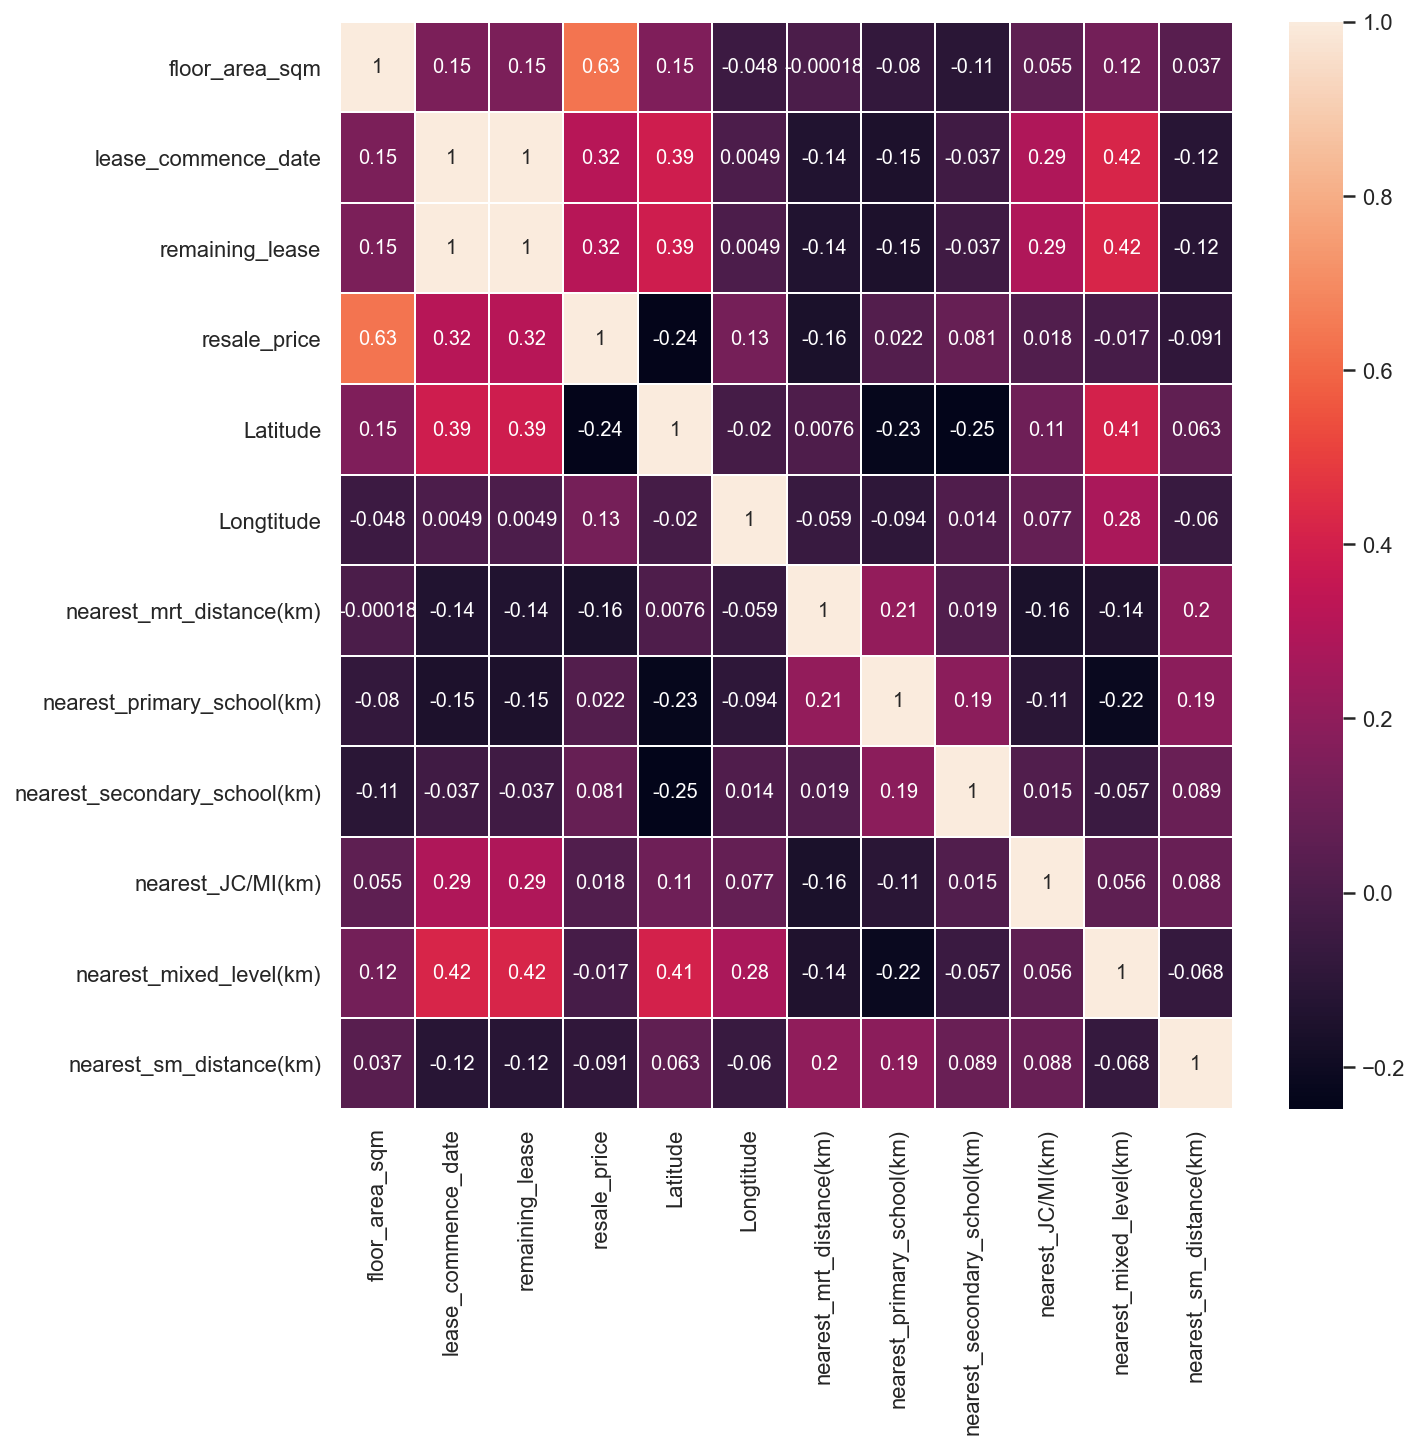

In [60]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [61]:
# df.info()

In [62]:
df['town'].unique()
df['town_region'] = df['town'].map({'ANG MO KIO':'North_East',
                             'BEDOK': 'East',
                             'BISHAN':'Central',
                             'BUKIT BATOK':'West',
                             'BUKIT MERAH':'Central',                 
                             'BUKIT PANJANG':'West',
                             'BUKIT TIMAH':'Central',
                             'CENTRAL AREA':'Central',
                             'CHOA CHU KANG':'West',
                             'CLEMENTI':'West',
                             'GEYLANG':'Central',
                             'HOUGANG':'North_East',
                             'JURONG EAST':'West',
                             'JURONG WEST':'West',
                             'KALLANG/WHAMPOA':'Central',
                             'MARINE PARADE':'Central',
                             'PASIR RIS': 'East',
                             'PUNGGOL':'North_East',
                             'QUEENSTOWN':'Central',
                             'SEMBAWANG': 'North',
                             'SENGKANG':'North_East',
                             'SERANGOON':'North_East',
                             'TAMPINES': 'East',
                             'TOA PAYOH':'Central',
                             'WOODLANDS': 'North',
                             'YISHUN': 'North'})
# df['town_region_encoded'] = df['town_region'].map({'West':1,'North':2, 'North_East':3,'East':4,'Central':5})
df = df.drop(columns = ['town'])

In [63]:
# df['storey_range'].unique()
# df['storey_range_encoded'] = df['storey_range'].map({
#                                         '10 TO 12':1,
#                                         '01 TO 03':2,
#                                         '04 TO 06':3,
#                                         '07 TO 09':4,
#                                         '13 TO 15':5,
#                                         '19 TO 21':6,
#                                         '22 TO 24':7,
#                                         '16 TO 18':8,
#                                         '34 TO 36':9,
#                                         '28 TO 30':10,
#                                         '37 TO 39':11,
#                                         '49 TO 51':12,
#                                         '25 TO 27':13,
#                                         '40 TO 42':14,
#                                         '31 TO 33':15,
#                                         '46 TO 48':16,
#                                         '43 TO 45':17})

### how school priority are assigned based on hdb
1. Singapore Citizens (SC) living within 1km of the school.
2. SCs living between 1km and 2km of the school.
3. SCs living outside 2km of the school.

### How mrt determines price of hdb based on distance
Properties within 0.5km of an MRT asked for a 15% premium over those in the general surrounding or neighbouring location.

- Golden range for school is <=2km
- Golden range for mrt <= 0.5km
- Golden range for supermakerts <=0.5km 

### Super market was assume to be nearby if <=1km. 

In [64]:
df['Is_Mrt_Nearby?'] = ['Yes' if i <= 0.5 else 'No' for i in df['nearest_mrt_distance(km)']]
df['Is_PrimarySchool_Nearby?'] = ['Yes' if i <= 2 else 'No' for i in df['nearest_primary_school(km)']]
df['Is_SecondarySchool_Nearby?'] = ['Yes' if i <=2 else 'No' for i in df['nearest_secondary_school(km)']]
df['Is_MixedLevel_Nearby?'] = ['Yes' if i <= 2 else 'No' for i in df['nearest_JC/MI(km)']]
df['Is_JC/MI_Nearby?'] = ['Yes' if i <= 2 else 'No' for i in df['nearest_mixed_level(km)']]
df['Is_sm_Nearby?'] = ['Yes' if i <= 1 else 'No' for i in df['nearest_sm_distance(km)']]
df = df.drop(columns = ['nearest_mrt_distance(km)',
                        'nearest_primary_school(km)',
                        'nearest_secondary_school(km)',
                        'nearest_JC/MI(km)',
                        'nearest_mixed_level(km)',
                        'nearest_sm_distance(km)'])

In [65]:
df

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,town_region,Is_Mrt_Nearby?,Is_PrimarySchool_Nearby?,Is_SecondarySchool_Nearby?,Is_MixedLevel_Nearby?,Is_JC/MI_Nearby?,Is_sm_Nearby?
0,3 ROOM,01 TO 03,68.0,New Generation,1981,61,270000.0,1.362432,103.851031,North_East,No,Yes,Yes,Yes,Yes,Yes
1,3 ROOM,04 TO 06,73.0,New Generation,1976,56,295000.0,1.366558,103.841624,North_East,No,Yes,Yes,Yes,Yes,Yes
2,3 ROOM,07 TO 09,67.0,New Generation,1978,58,270000.0,1.367396,103.838150,North_East,No,Yes,Yes,Yes,Yes,Yes
3,3 ROOM,01 TO 03,67.0,New Generation,1978,58,230000.0,1.367396,103.838150,North_East,No,Yes,Yes,Yes,Yes,Yes
4,3 ROOM,01 TO 03,68.0,New Generation,1981,61,262500.0,1.361343,103.851699,North_East,No,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,EXECUTIVE,04 TO 06,142.0,Apartment,1988,68,580000.0,1.429551,103.842440,North,No,Yes,Yes,Yes,No,Yes
22182,EXECUTIVE,07 TO 09,146.0,Maisonette,1988,68,565000.0,1.429551,103.842440,North,No,Yes,Yes,Yes,No,Yes
22183,EXECUTIVE,01 TO 03,164.0,Apartment,1992,72,633000.0,1.420777,103.835219,North,Yes,Yes,Yes,Yes,No,Yes
22184,EXECUTIVE,10 TO 12,164.0,Apartment,1992,72,788888.0,1.421713,103.835545,North,No,Yes,Yes,Yes,No,Yes


# 2. Baseline Model (Decision Tree)
A simple/initial model that you compare your later/more complex models against. It is basically the benchmark for your problem statement.

#### Label Encoder for ordinal data columns

In [66]:
#technically town, flat_type, streets_name and flat_model have a "tier" of sort, some town are better areas to live,
#some flat_type are better,
for column in df.columns:
    if (df[column].dtype == type(object)) and (column != 'flat_type'):
        #Create the label encoder
        le = preprocessing.LabelEncoder()
        #Convert the non numeric data to numeric
        df[column] = le.fit_transform(df[column])

In [67]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,town_region,Is_Mrt_Nearby?,Is_PrimarySchool_Nearby?,Is_SecondarySchool_Nearby?,Is_MixedLevel_Nearby?,Is_JC/MI_Nearby?,Is_sm_Nearby?
6443,3 ROOM,3,67.0,10,1979,59,268000.0,1.368077,103.854353,3,0,1,1,1,1,1
3387,3 ROOM,3,67.0,10,1980,60,318000.0,1.320270,103.765945,4,0,1,1,0,1,1
7787,3 ROOM,6,67.0,6,2015,95,346888.0,1.393908,103.878223,3,1,1,1,0,0,1
9360,5 ROOM,4,110.0,3,2000,80,430000.0,1.341455,103.699482,4,1,1,1,0,1,1
6899,4 ROOM,2,104.0,6,1988,68,740000.0,1.339572,103.774678,0,1,1,1,0,0,1


In [ ]:
df.info()

#### One Hot Encoder for nominal data columns

In [ ]:
# #OneHotEncoder categorical nominal data column "town","flat_type","street_name","flat_model","Day of Week"
# cols = ["town","street_name","flat_model"]
# for i in cols:
#     labelbinarizer = LabelBinarizer()
#     x = labelbinarizer.fit_transform(df[i])
#     encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
#     df = pd.concat([df, encoded_df], axis=1)

### Building Decision Tree Model

In [119]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', '2 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [120]:
#split dataset in features and target variable
feature_cols = df.drop(columns = ['flat_type'])
X = feature_cols
#y = df[['flat_type']]
y = df['flat_type']

In [126]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 50% training and 50% test

In [127]:
# initialise Decision Tree
#Using gini currently, can also use entropy or miclassification error.
clf = DecisionTreeClassifier(criterion='gini',random_state=0) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [128]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(100)

,Actual,Predicted
12637,4 ROOM,4 ROOM
22097,4 ROOM,4 ROOM
8551,4 ROOM,4 ROOM
14009,4 ROOM,4 ROOM
1865,4 ROOM,4 ROOM
...,...,...
9097,3 ROOM,3 ROOM
9924,3 ROOM,3 ROOM
14912,5 ROOM,5 ROOM
10020,5 ROOM,5 ROOM


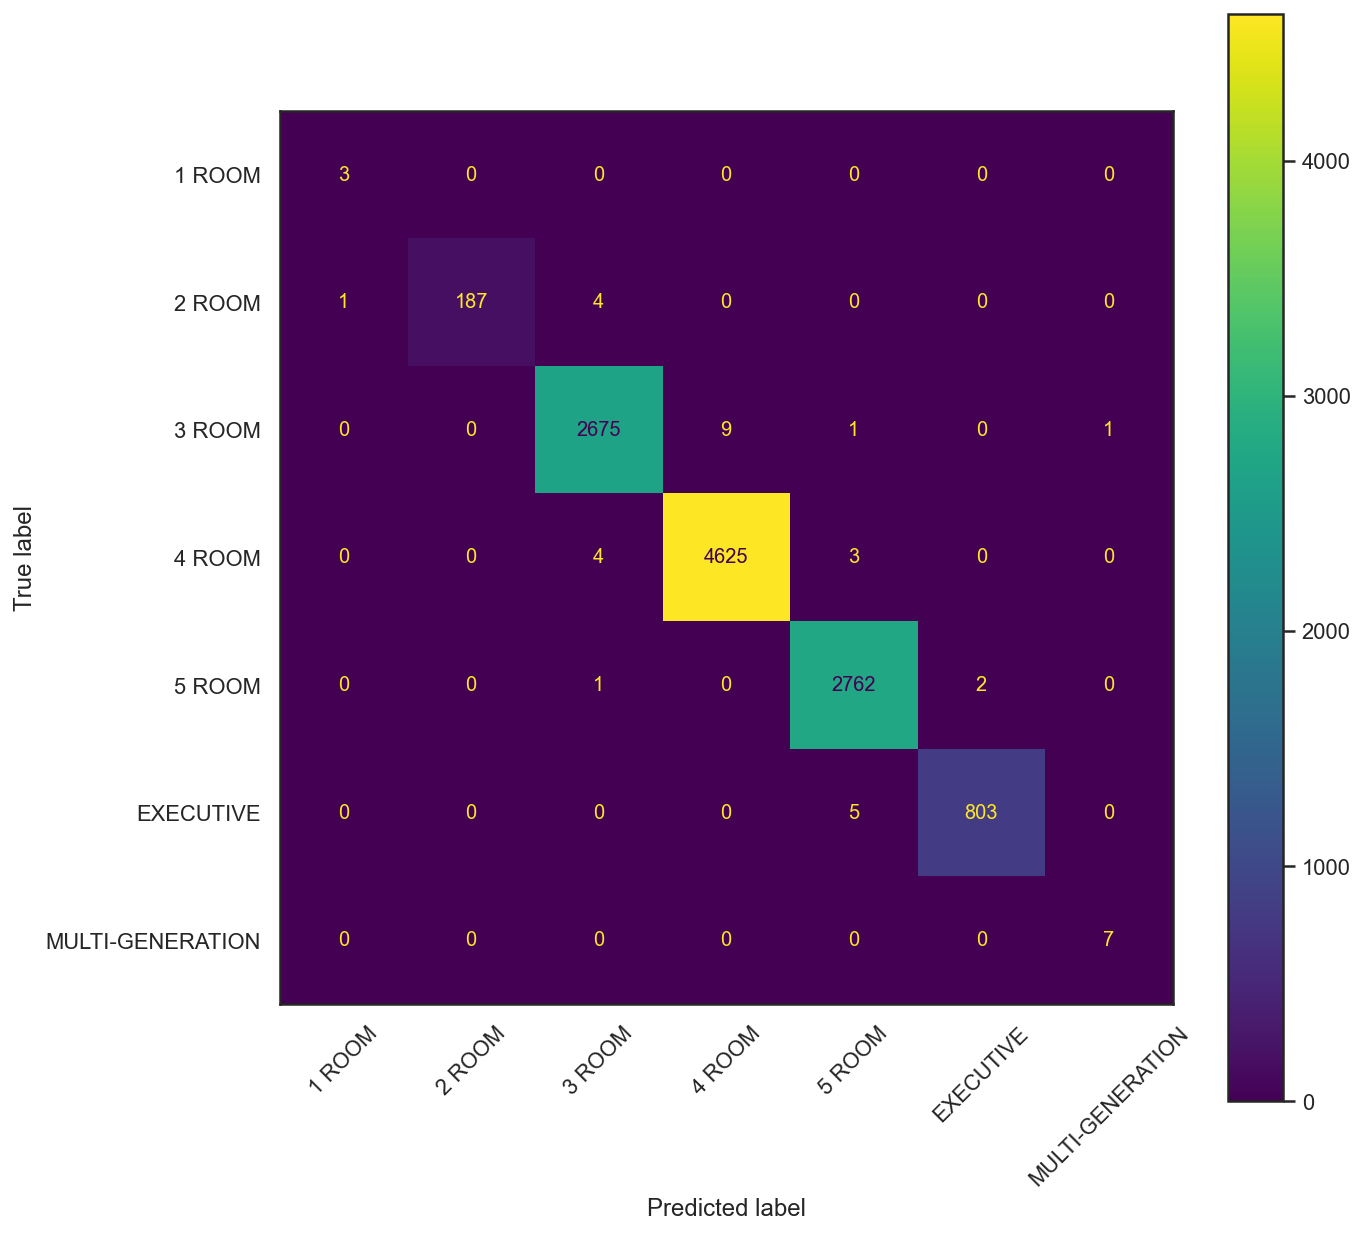

In [129]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [130]:
# Accuracy
asr_dt = accuracy_score(y_test,predictions)
print("Accuracy:",asr_dt)

# Precision = (True Positive)/(Total Predicted Positive)
# To determine if costs of False Positive is high.
precision = metrics.precision_score(y_test, predictions, average='micro')
precision1 = metrics.precision_score(y_test, predictions, average='macro')
precision2 = metrics.precision_score(y_test, predictions, average='weighted')

#Recall = (True Positive)/(Total Actual Positive)
# calculates the no. of Actual Positives our model capture through labeling it as Positive
recall = metrics.recall_score(y_test, predictions, average='micro')
recall1 = metrics.recall_score(y_test, predictions, average='macro')
recall2 = metrics.recall_score(y_test, predictions, average='weighted')

#F1-score = 2* (precision*recall)/(precision + recall)
# F1 Score is needed when you want to seek a balance between Precision and Recall.
f_measure = metrics.f1_score(y_test, predictions, average='micro')
f_measure1 = metrics.f1_score(y_test, predictions, average='macro')
f_measure2 = metrics.f1_score(y_test, predictions, average='weighted')

# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
print("Precision_micro:",precision)
print("Recall_micro:",recall)
print("F-measure_micro:",f_measure)

print("Precision1_macro:",precision1)
print("Recall1_macro:",recall1)
print("F-measure1_macro:",f_measure1)

print("Precision2_weighted:",precision2)
print("Recall2_weighted:",recall2)
print("F-measure2_weighted:",f_measure2)

Accuracy: 0.9972054448751465
Precision_micro: 0.9972054448751465
Recall_micro: 0.9972054448751465
F-measure_micro: 0.9972054448751465
Precision1_macro: 0.9448531760351219
Recall1_macro: 0.9944398126144579
F-measure1_macro: 0.9664750101355096
Precision2_weighted: 0.9972400804163271
Recall2_weighted: 0.9972054448751465
F-measure2_weighted: 0.9972117349682965


In [131]:
###################################################################################################################################


In [156]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


In [157]:
#Create the kNN classifier and set the number of neighbors to be 3. Note that you can tune this number of neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the training feature Xs and training label Ys
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [158]:
y_pred = model.predict(X_test)

In [160]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_knn = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out different scores.
f2 = precision_score(y_pred, y_test,average='micro')
f3 = recall_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr_knn)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   1    4    1    0    0    0    0]
 [   2  134   25    4    1    0    0]
 [   0   53 2401  136   10    1    0]
 [   0    1  246 4195  334   43    1]
 [   0    0   12  283 2327  157    5]
 [   0    0    1   14   93  607    1]
 [   0    0    0    0    0    0    0]]
accuracy:  0.8712701703777157
f1-Score:  0.8712701703777157
precision:  0.8712701703777157
recall:  0.8712701703777157


## Bagging (with Decision Tree)

Refer to the following links on for detail explanation on the implementation:

In [161]:
#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50)

In [162]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)

In [163]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_bag = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr_bag)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   3    1    0    0    0    0    0]
 [   0  189    0    0    0    0    0]
 [   0    2 2672    7    1    0    0]
 [   0    0   12 4622    0    0    0]
 [   0    0    1    3 2762    3    0]
 [   0    0    0    0    2  805    0]
 [   0    0    1    0    0    0    7]]
Accuracy:  0.9970251509961237
F1-Score_micro:  0.9970251509961237
precision_micro:  0.9970251509961237
recall_micro:  0.9970251509961237
F1-Score_maro:  0.9672648539807139
precision_macro:  0.9960294330916651
recall_macro:  0.9448107972250515
F1-Score_weighted:  0.9970171775615554
precision_weighted:  0.9970308103275964
recall_weighted:  0.9970251509961237


In [164]:
# get predictions and compare results
predictions = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
15930,3 ROOM,3 ROOM
12886,5 ROOM,5 ROOM
10153,4 ROOM,4 ROOM
12798,4 ROOM,4 ROOM
14854,4 ROOM,4 ROOM
15883,4 ROOM,4 ROOM
9710,3 ROOM,3 ROOM
1704,4 ROOM,4 ROOM
19479,5 ROOM,5 ROOM
12145,3 ROOM,3 ROOM


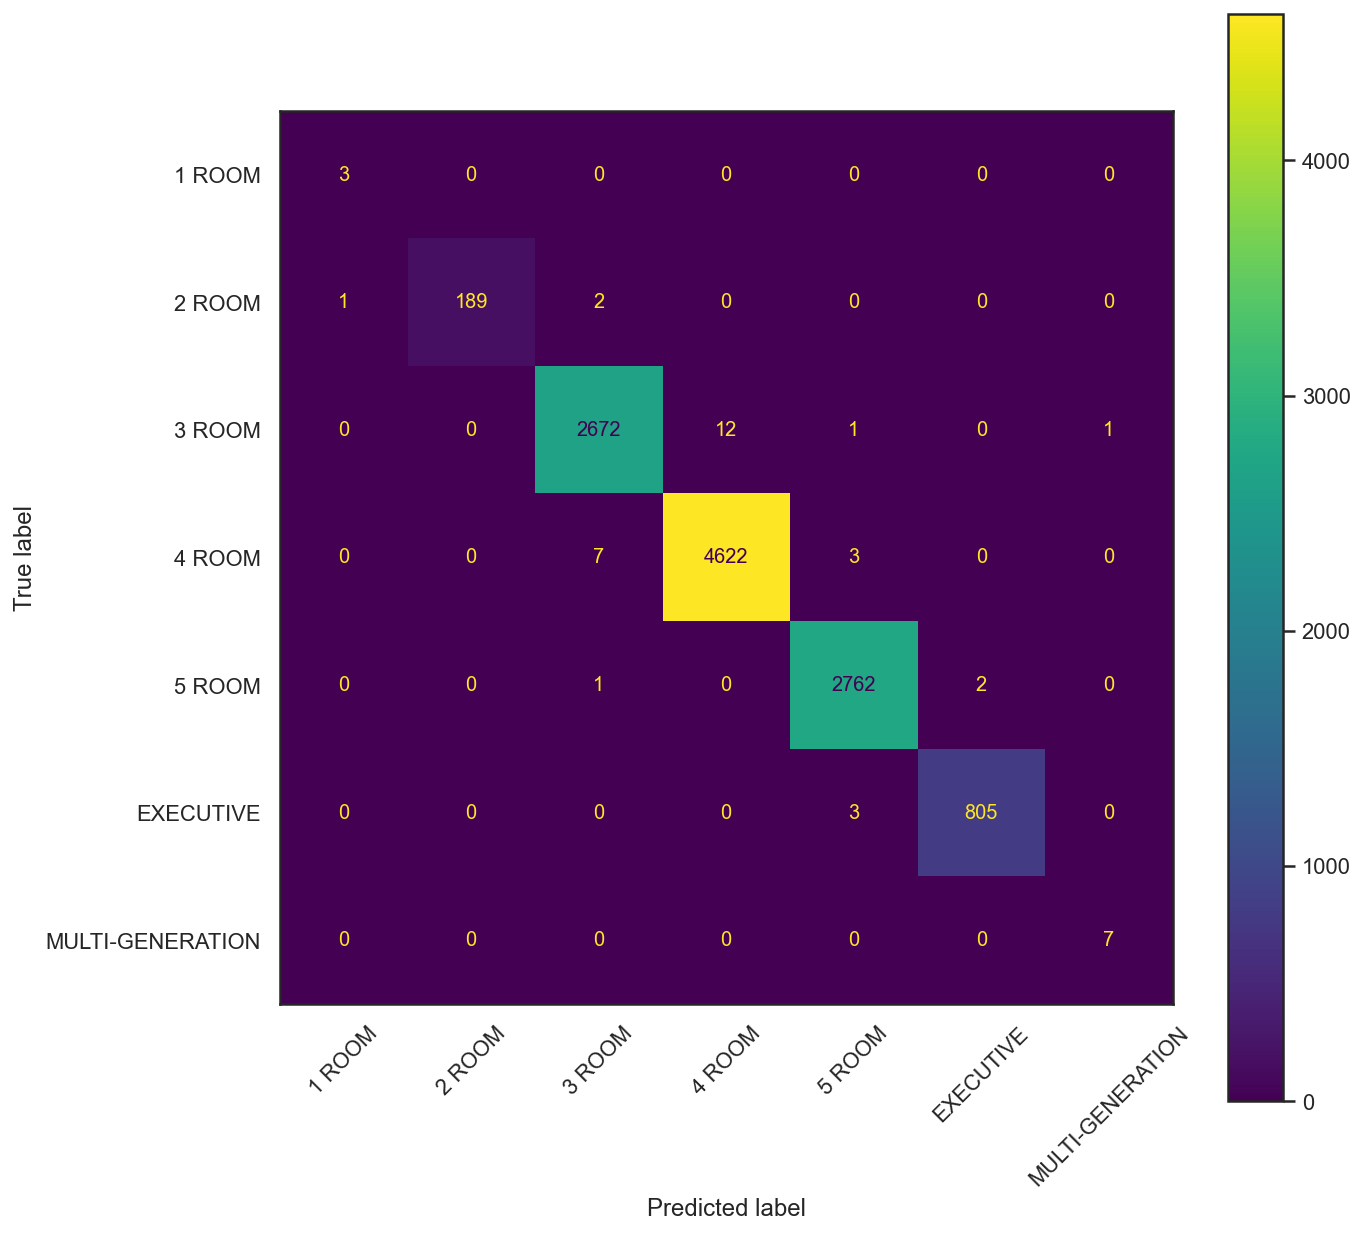

In [165]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation = 45);

## Bagging (with kNN)

In [166]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [167]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
bag_knn = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,pos_label='positive',average='micro')
f3 = recall_score(y_pred, y_test,pos_label='positive',average='micro')
#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',bag_knn)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   3    1    0    0    0    0    0]
 [   0  189    0    0    0    0    0]
 [   0    2 2672    7    1    0    0]
 [   0    0   12 4622    0    0    0]
 [   0    0    1    3 2762    3    0]
 [   0    0    0    0    2  805    0]
 [   0    0    1    0    0    0    7]]
accuracy:  0.9970251509961237
f1-Score:  0.9970251509961237
precision:  0.9970251509961237
recall:  0.9970251509961237


## AdaBoost (with Decision Tree)


In [177]:
#Create the AdaBoost classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
modelA = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

#Fit the training feature Xs and training label Ys
modelA.fit(X_train, y_train)

#Use the trained modelA to predict the test data
y_pred = modelA.predict(X_test)

In [178]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
# Find the accuracy and F1 score of the result
asr_ada = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr_ada)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   3  192  769    3    0    0    0]
 [   0    0 1915 4545   26    0    0]
 [   0    0    2   84 2739  808    7]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
Accuracy:  0.7259533038853331
F1-Score_micro:  0.7259533038853332
precision_micro:  0.7259533038853331
recall_micro:  0.7259533038853331
F1-Score_maro:  0.2991266041667836
precision_macro:  0.3225876702094231
recall_macro:  0.32120794323215535
F1-Score_weighted:  0.7953862034190238
precision_weighted:  0.9237177557930069
recall_weighted:  0.7259533038853331


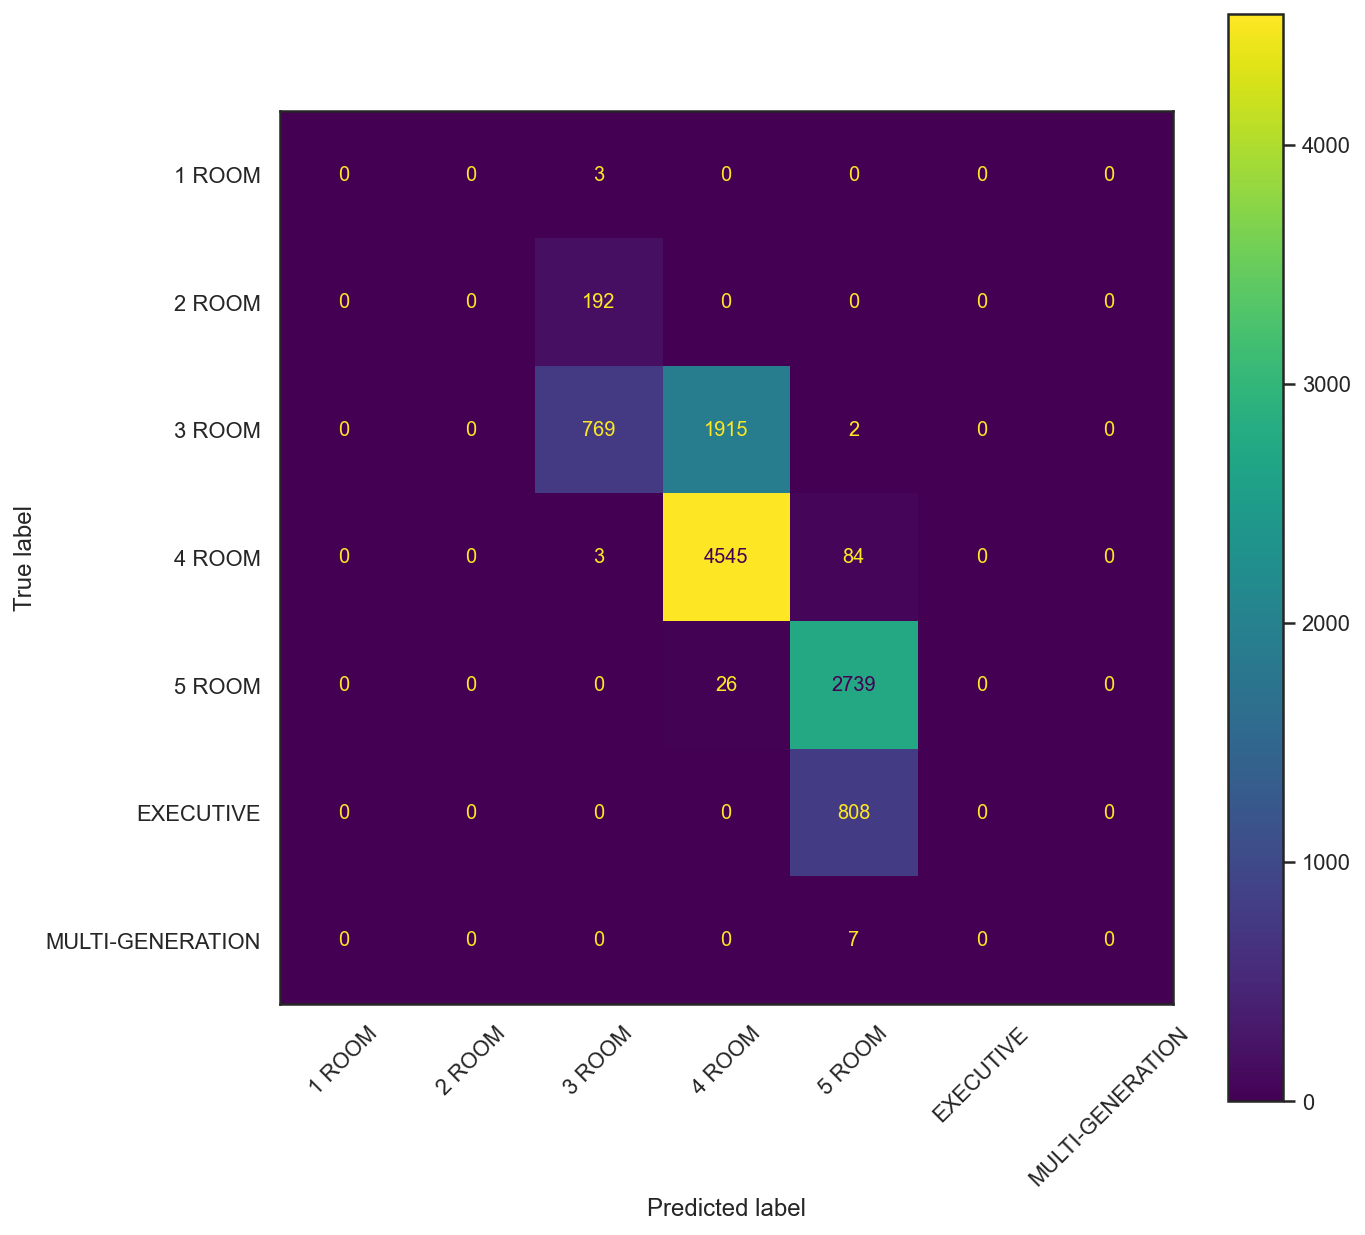

In [179]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(modelA, X_test, y_test, ax=ax, xticks_rotation = 45);

## AdaBoost (with Gaussian Navie Bayes)
Refer to the following links on for detail explanation on the implementation:

In [171]:
model = GaussianNB()
#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

GaussianNB()

In [172]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_gnb = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr_gnb)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   3    1    0    0    0    0    0]
 [   0  179    0    0    0    0    0]
 [   0   12 2601   84    0    0    0]
 [   0    0   83 4391  109    0    0]
 [   0    0    1  157 2513  146    0]
 [   0    0    1    0  143  660    5]
 [   0    0    0    0    0    2    2]]
accuracy:  0.9329306770035157
f1-Score:  0.9329306770035157
precision:  0.831692352219125
recall:  0.9328761901161837


In [173]:
nb = GaussianNB()

model = AdaBoostClassifier(n_estimators=50,learning_rate=1, base_estimator=nb)
#model = BaggingClassifier(n_estimators=50, base_estimator=knn)


#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=1)

In [174]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_gnb2 = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('asr: ',asr_gnb2)
print('f1: ',f1)
print('f2: ',f2)
print('f3: ',f3)

[[   3    0    0    0    0    0    0]
 [   0  171   17    0    0    0    0]
 [   0   21 2568  450   50    0    0]
 [   0    0   98 3394  118    0    0]
 [   0    0    2  788 2591  433    0]
 [   0    0    1    0    6  363    4]
 [   0    0    0    0    0   12    3]]
asr:  0.8197061209771929
f1:  0.8197061209771929
f2:  0.7553621895592814
f3:  0.8230852391877763


# Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth = 2, n_estimators=100, random_state=424, criterion ='entropy')
clf = RandomForestClassifier(n_estimators=100, random_state=0, criterion ='entropy')

clf.fit(X_train,y_train)

# get predictions 
predictions = clf.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).sample(10)

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[   3,    0,    0,    0,    0,    0,    0],
       [   0,  189,    3,    0,    0,    0,    0],
       [   0,    0, 2672,   12,    2,    0,    0],
       [   0,    0,    3, 4621,    8,    0,    0],
       [   0,    0,    0,    0, 2763,    2,    0],
       [   0,    0,    0,    0,   12,  796,    0],
       [   0,    0,    0,    0,    0,    0,    7]], dtype=int64)

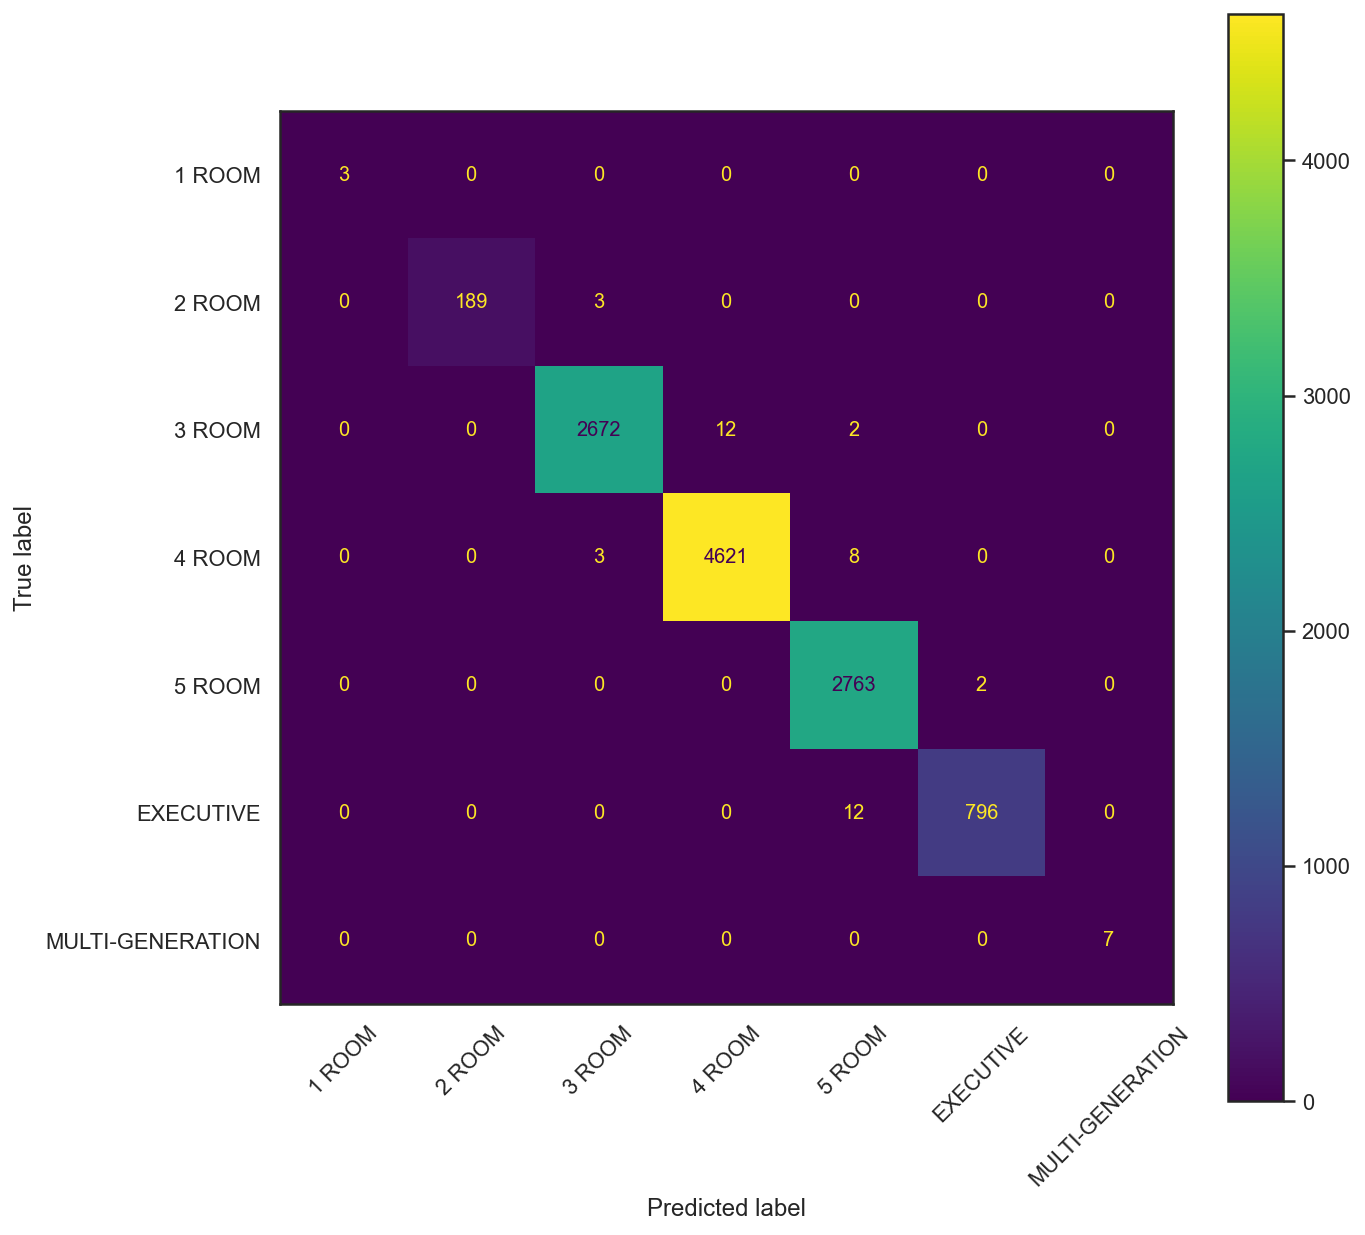

In [181]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [182]:
# Find the accuracy and F1 score of the result
asr_rf = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr_rf)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

accuracy:  0.7259533038853331
f1-Score:  0.7259533038853332
precision:  0.2991266041667836
recall:  0.7953862034190238


In [153]:
visualized = [asr_dt,asr_knn,asr_bag,bag_knn,asr_knn,asr_ada,asr_gnb,asr_gnb2,asr_rf]

In [154]:
sum(visualized)/9

0.8924547011628956

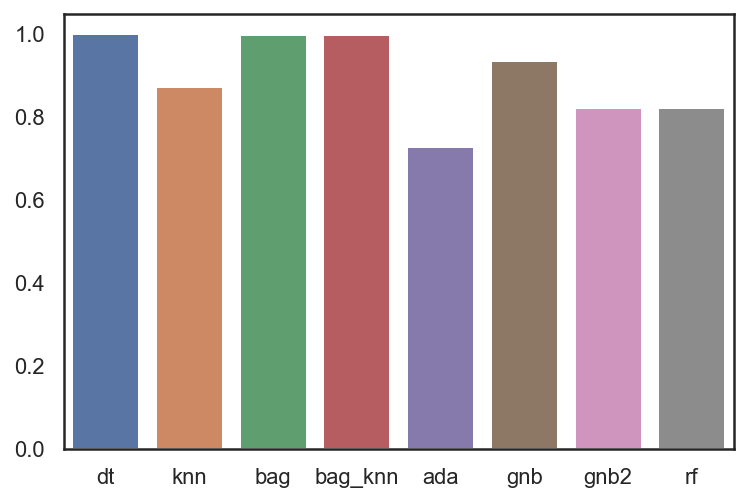

In [155]:
names = ['dt','knn','bag','bag_knn','knn','ada','gnb','gnb2','rf']

import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.barplot(x=names, y = visualized)